# 第x章 Tensor的初始化方法和运算

本章说明：  本章介绍几种tensor的初始化方法， tensor到torch的转换形式以及 tensor的运算

In [42]:
import torch
import numpy as np

# 1.tensor赋值初始化

In [37]:
data = np.array([1,2,3], dtype='int32')

# 按默认类型
t1 = torch.Tensor(data)

# 按参数 推断类型
t2 = torch.tensor(data)

# numpy 共享桥
t3 = torch.from_numpy(data)

# 初始化为 Int
t5 = torch.IntTensor(data)


In [38]:
print("t1:  ",type(t1) , t1, t1.type())
print("t2:  ",type(t2) , t2, t2.type())
print("t3:  ",type(t3) , t3, t3.type())
print("t4:  ",type(t4) , t4, t4.type())
print("t5:  ",type(t5) , t5, t5.type())

t1:   <class 'torch.Tensor'> tensor([1., 2., 3.]) torch.DoubleTensor
t2:   <class 'torch.Tensor'> tensor([1, 2, 3], dtype=torch.int32) torch.IntTensor
t3:   <class 'torch.Tensor'> tensor([1, 2, 3], dtype=torch.int32) torch.IntTensor
t4:   <class 'torch.Tensor'> tensor([1., 2., 3.], dtype=torch.float32) torch.FloatTensor
t5:   <class 'torch.Tensor'> tensor([1, 2, 3], dtype=torch.int32) torch.IntTensor


由t1可见， 当前torch默认的tensor类型是FLoat

In [39]:
#更改 默认tensor类型
torch.set_default_tensor_type(torch.DoubleTensor)

In [40]:
print("t1:  ",type(t1) , t1, t1.type())
print("t2:  ",type(t2) , t2, t2.type())
print("t3:  ",type(t3) , t3, t3.type())
print("t4:  ",type(t4) , t4, t4.type())
print("t5:  ",type(t5) , t5, t5.type())

t1:   <class 'torch.Tensor'> tensor([1., 2., 3.]) torch.DoubleTensor
t2:   <class 'torch.Tensor'> tensor([1, 2, 3], dtype=torch.int32) torch.IntTensor
t3:   <class 'torch.Tensor'> tensor([1, 2, 3], dtype=torch.int32) torch.IntTensor
t4:   <class 'torch.Tensor'> tensor([1., 2., 3.], dtype=torch.float32) torch.FloatTensor
t5:   <class 'torch.Tensor'> tensor([1, 2, 3], dtype=torch.int32) torch.IntTensor


# 2. 随机初始化

rand函数， 使用均匀分布初始化 tensor

In [47]:
torch.rand(2,3)

tensor([[0.1146, 0.1970, 0.2437],
        [0.3772, 0.2725, 0.7879]])

rand_like（x） 接受一个tensor x作为参数。 读x的shape喂给rand生成相应shape的[0，1]均值分布

In [50]:
x = torch.rand(2,3)
x2 = torch.rand_like(x)
print("x:  ", x)
print("x2:  ", x2)

x:   tensor([[0.6796, 0.1321, 0.6158],
        [0.1924, 0.7493, 0.8432]])
x2:   tensor([[0.2911, 0.7690, 0.8775],
        [0.3024, 0.4375, 0.3505]])


randint 在[min,max) 范围内均匀生成整数样本

In [55]:
torch.randint(3,9,[3,3])

tensor([[4., 7., 6.],
        [3., 6., 6.],
        [6., 8., 5.]])

生成标准正态分布

In [56]:
torch.randn([3,2])

tensor([[ 0.6113,  1.4248],
        [-1.1113, -1.8980],
        [ 0.6580, -0.9104]])

自定义正态分布均值方差。 接受两个tensor作为变量分别描述生成tensor每一个元素的均值和方差

**下面是一个方差逐步减小的例子。

In [63]:
torch.normal(mean=torch.full([20],0), std=torch.arange(2,0,-0.1))

tensor([-0.2211, -1.4520, -1.7881,  2.0585,  1.3889,  3.4515,  0.3287,  0.9760,
         1.0589,  0.2532,  0.7253, -0.1283,  1.0584,  0.3566,  0.6167, -0.7527,
        -0.9969,  0.2055, -0.0927, -0.1621])

Shuffle  洗牌。 torch.randperm 输入一个 n 生成[0,n)  的洗牌. 可以作为index 抽取样本

In [71]:
torch.randperm(5)

tensor([0, 2, 1, 4, 3])

# 3. Tensor 的计算

## 3.1 矩阵相乘

In [77]:
# 矩阵相乘
A = torch.FloatTensor([[1,2],[3,4],[3,4]])
B = torch.FloatTensor([[1,2,3],[3,4,5]])
print(A)
print(B)

tensor([[1., 2.],
        [3., 4.],
        [3., 4.]], dtype=torch.float32)
tensor([[1., 2., 3.],
        [3., 4., 5.]], dtype=torch.float32)


In [81]:
# 矩阵相乘，注意shape对其
print(torch.mm(A,B))
# 同上语法糖
print(A@B)

tensor([[ 7., 10., 13.],
        [15., 22., 29.],
        [15., 22., 29.]], dtype=torch.float32)
tensor([[ 7., 10., 13.],
        [15., 22., 29.],
        [15., 22., 29.]], dtype=torch.float32)


## 3.2激活函数

In [89]:
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [125]:
x = torch.linspace(-5,5,100)
x_np = x.numpy()

y_relu = torch.relu(x).numpy()
y_softmax = torch.sigmoid(x).numpy()
y_tanh = torch.tanh(x).numpy()

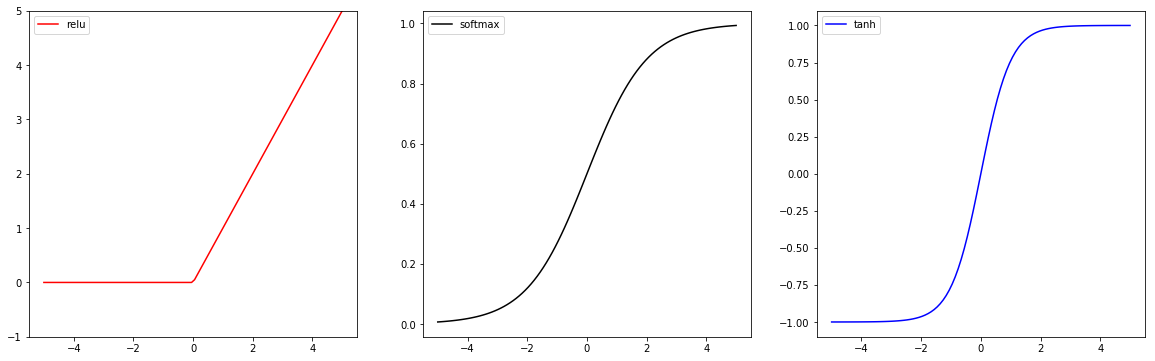

In [126]:
plt.figure(1, figsize=(20,6))

plt.subplot(1,3,1)
plt.plot(x_np, y_relu, '-r', label="relu")
plt.ylim((-1,5))
plt.legend(loc="best")

plt.subplot(1,3,2)
plt.plot(x_np, y_softmax, '-k', label="softmax")
plt.legend(loc="best")

plt.subplot(1,3,3)
plt.plot(x_np, y_tanh, '-b', label="tanh")
plt.legend(loc="best")